c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

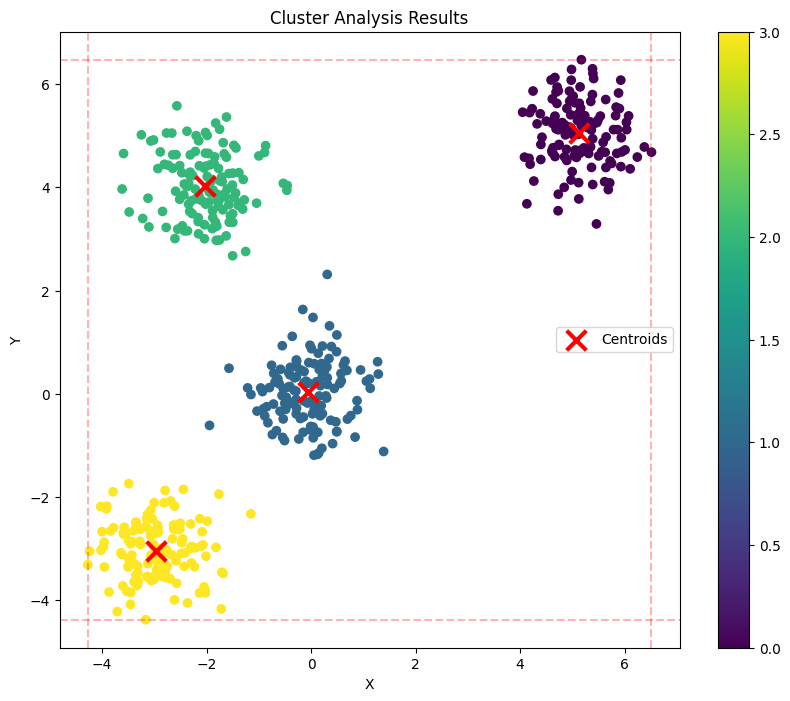

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def load_data():
    df = pd.read_csv('points.csv', header=None, names=['x', 'y'])
    return df.values

def find_optimal_clusters(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    optimal_k = np.argmax(silhouette_scores) + 2
    return optimal_k

def analyze_clusters(data):
    #bb
    min_bounds = np.min(data, axis=0)
    max_bounds = np.max(data, axis=0)
    k = find_optimal_clusters(data)
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_
    
    return labels, centroids, min_bounds, max_bounds

def plot_results(data, labels, centroids, min_bounds, max_bounds):
    plt.figure(figsize=(10, 8))
    
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='red', marker='x', s=200, linewidth=3, label='Centroids')
    
    plt.axhline(y=min_bounds[1], color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=max_bounds[1], color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=min_bounds[0], color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=max_bounds[0], color='r', linestyle='--', alpha=0.3)
    
    plt.colorbar(scatter)
    plt.legend()
    plt.title('Cluster Analysis Results')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

data = load_data()
labels, centroids, min_bounds, max_bounds = analyze_clusters(data)
plot_results(data, labels, centroids, min_bounds, max_bounds)


c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


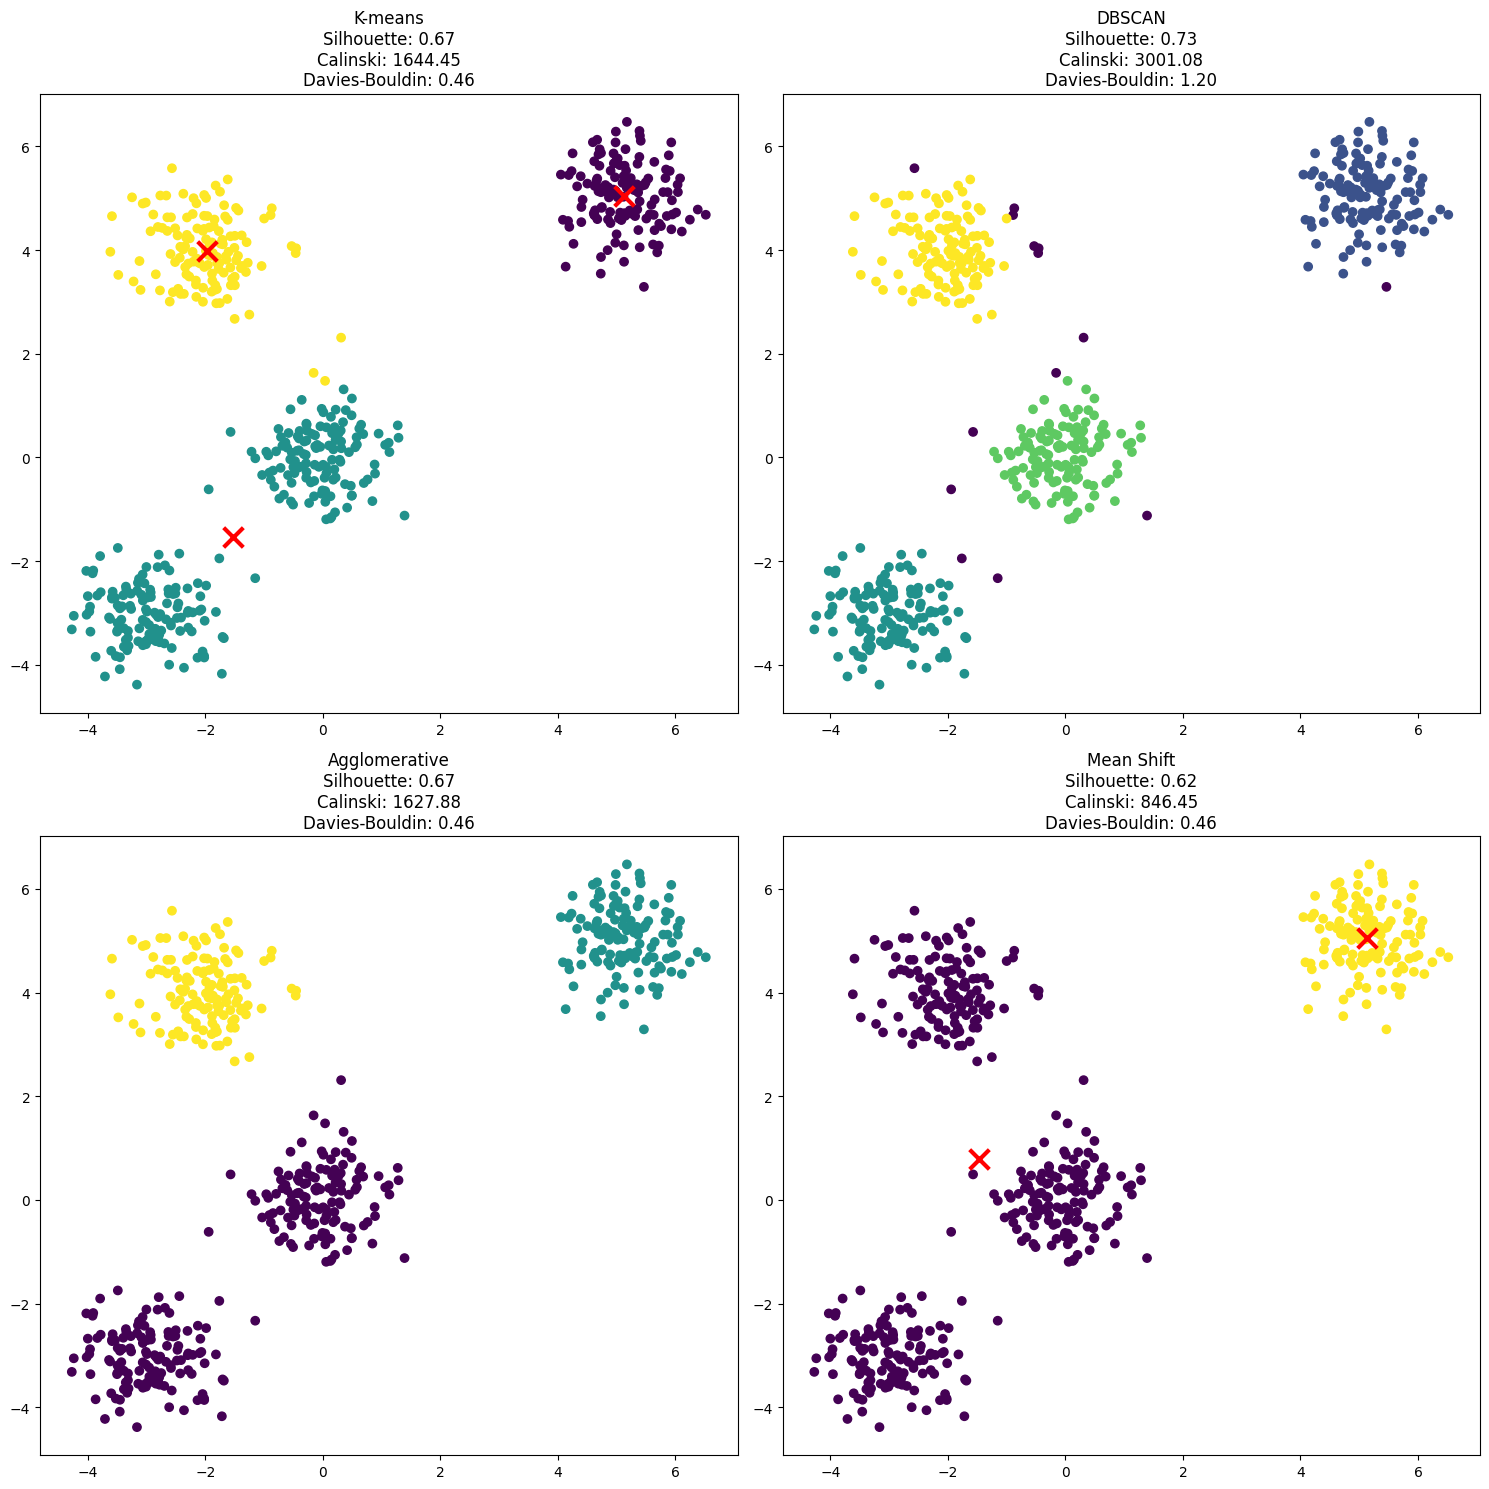

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def load_data(filename='points.csv'):
    df = pd.read_csv(filename, header=None, names=['x', 'y'])
    return df.values

def evaluate_clustering(data, labels):
    if len(np.unique(labels)) < 2:
        return 0, 0, 0
    
    scores = {
        'silhouette': silhouette_score(data, labels),
        'calinski': calinski_harabasz_score(data, labels),
        'davies': davies_bouldin_score(data, labels)
    }
    return scores

def apply_clustering(data):
    algorithms = {
        'K-means': KMeans(n_clusters=3),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'Agglomerative': AgglomerativeClustering(n_clusters=3),
        'Mean Shift': MeanShift()
    }
    
    results = {}
    for name, algo in algorithms.items():
        labels = algo.fit_predict(data)
        scores = evaluate_clustering(data, labels)
        results[name] = {
            'labels': labels,
            'scores': scores,
            'centroids': getattr(algo, 'cluster_centers_', None)
        }
    
    return results

def plot_results(data, results):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.ravel()
    
    for idx, (name, result) in enumerate(results.items()):
        ax = axes[idx]
        labels = result['labels']
        scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
        
        if result['centroids'] is not None:
            ax.scatter(result['centroids'][:, 0], result['centroids'][:, 1], 
                      c='red', marker='x', s=200, linewidth=3)
        
        scores = result['scores']
        title = f"{name}\nSilhouette: {scores['silhouette']:.2f}\n"
        title += f"Calinski: {scores['calinski']:.2f}\n"
        title += f"Davies-Bouldin: {scores['davies']:.2f}"
        ax.set_title(title)
        
    plt.tight_layout()
    plt.show()

data = load_data()
results = apply_clustering(data)
plot_results(data, results)


c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

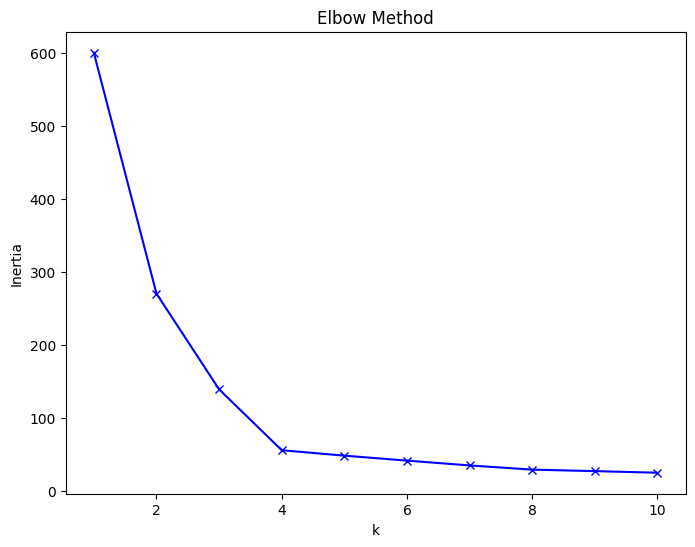

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


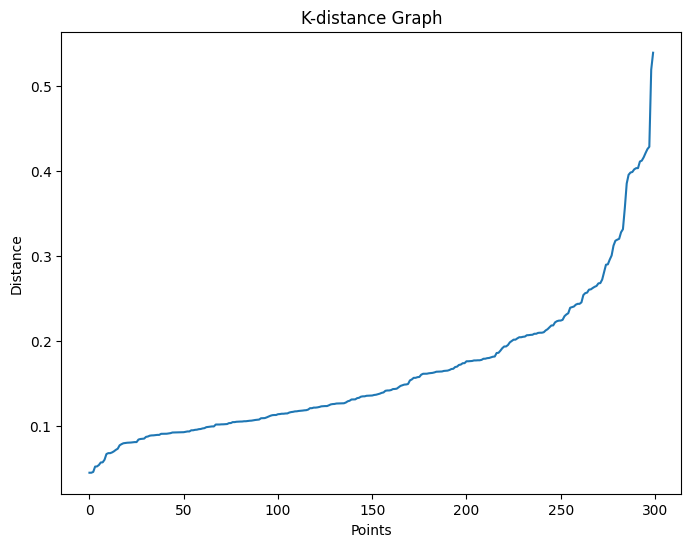

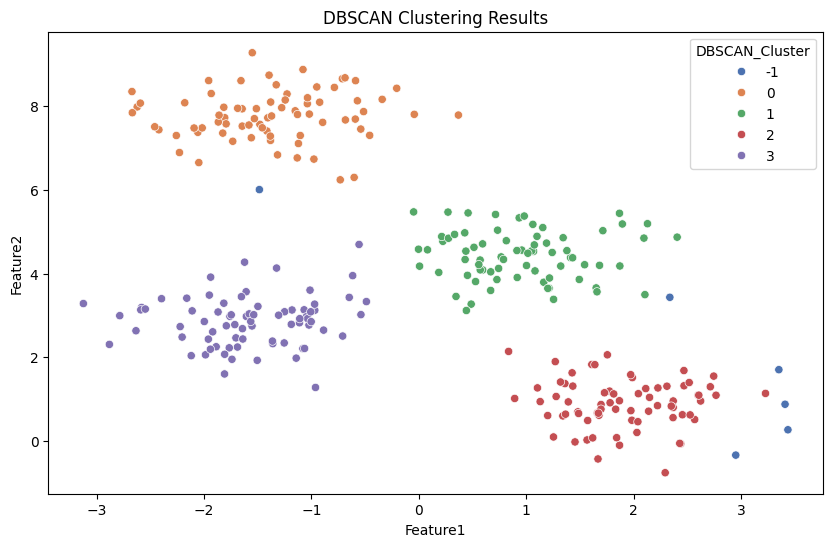

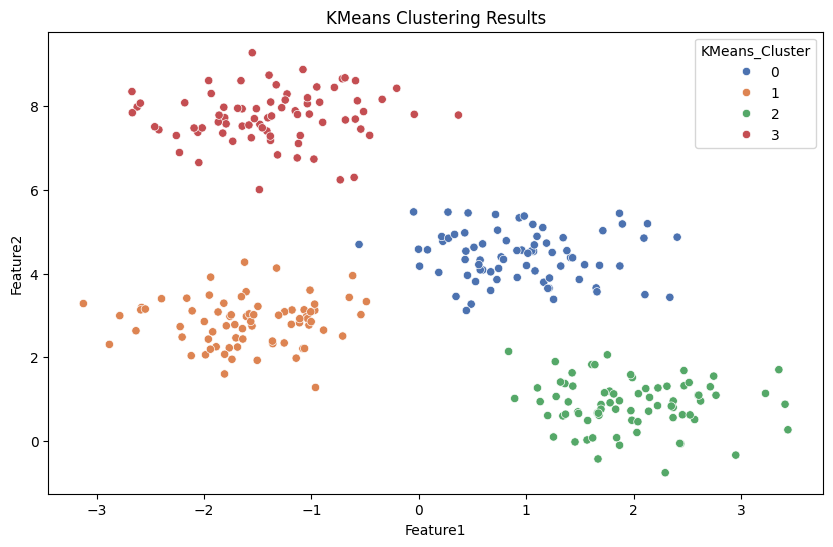

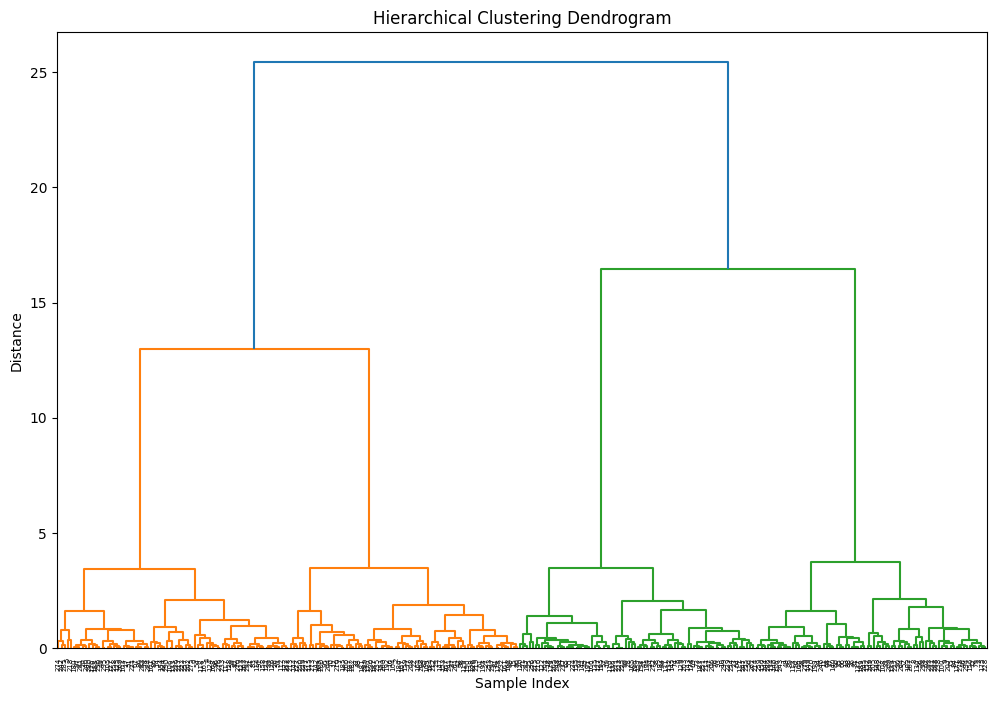

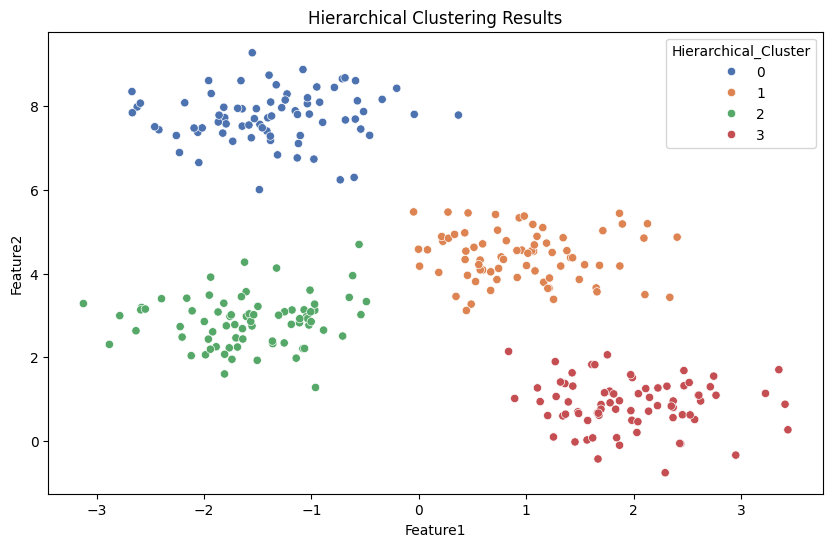

In [5]:
# Testing the best clustering methods for this dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

pd.set_option('display.max_rows', None)

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def find_optimal_eps(X, n_neighbors=5):
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:, -1])
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(distances)), distances)
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.title('K-distance Graph')
    plt.show()
    
    return distances

def plot_elbow(X, max_k=10):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k+1), inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

plot_elbow(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


distances = find_optimal_eps(X_scaled)

dbscan = DBSCAN(eps=0.3, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2', 
                hue='DBSCAN_Cluster', palette='deep')
plt.title('DBSCAN Clustering Results')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='KMeans_Cluster', palette='deep')
plt.title('KMeans Clustering Results')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=4)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Hierarchical_Cluster', palette='deep')
plt.title('Hierarchical Clustering Results')
plt.show()